In [57]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1=finesse.kat()
kat.verbose=True

In [58]:
kat.parse("""


l laser 10 0 n1                          #laser 10W
s gap01 1 n1 n2                         #space b/w mod and laser  
mod sb1 55.5556M 0.3 3 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 n31                     #space b/w mod and PRM      ---> REFL <---


##### FOR ANGULAR SENSING #####
bs pickoff 0.1 0.9 0 45 n31 dump n32 refl_a
s s2 0.1 refl_a a8                       
bs bsQPD 0.5 0.5 0 45 a8 a9 a10 dump            #bs to split power between two detectors 

s sQPD1 0.1 a9 a11                   
s sQPD2 0.1 a10 a12

attr s2 g 45                                 #guoy phase for det1

attr sQPD1 g 0                                 #guoy phase for det1
attr sQPD2 g 90                                #guoy phase for det2

pd1 QPDrefl1 55.5556M 90 a11                       #Split detector1 refl
pdtype QPDrefl1 x-split   

pd1 QPDrefl2 55.5556M 90 a12                       #Split detector2 refl
pdtype QPDrefl2 x-split  
######




s gap03 0.5 n32 refl

m PRM 0.759 0.1 90 refl pop               #PRM                ---> POP <---
#m PRM 0 1 90 refl pop               #PRM
s PRC 1.35 pop b3                        #PRC 
m ITM 0.98997 0.01 0 b3 n12              #ITM
s ARM 3.3 n12 b5                        #ARM length 3.3
m ETM 0.99996 0.00001 0 b5 b6           #ETM
#m ETM 0 1 0 b5 b6 

cav PRCL PRM pop ITM b3
cav ARML ITM n12 ETM b5 
trace 2 

attr ETM Rc 11.3            # RoC of ETM
attr PRM Rc -23.6           # RoC of PRM

attr PRM xbeta 0            # misalgnment 
attr ETM xbeta 0         
attr ITM xbeta 0 


#### LOCK PRM ####
set err refl_Q re
func newerr = $err*2000
lock clock $newerr -1 1n
func z = $clock
put* PRM phi $z
#####


pd circ_arm b5
pd circ_prc pop
pd refl refl
pd trans b6

pd1 refl_I 55.5556M 42.7 refl              # REFL I  1f
pd1 refl_Q 55.5556M 132.5 refl             # REFL Q  1f

pd1 refl_I_f3 166.6668M 71 refl          # REFL I  3f
pd1 refl_Q_f3 166.6668M 111.7 refl         # REFL Q  3f

pd1 pop_I_raw 55.5556M 42.1818 pop                # POP I  1f
pd1 pop_Q_raw 55.5556M 100 pop               # POP Q  1f

pd1 pop_I_f3_raw 166.6668M -17.18 pop            # POP I  3f
pd1 pop_Q_f3_raw 166.6668M 72.82 pop           # POP Q  3f



xaxis ETM phi lin 0 80 900
#xaxis PRM xbeta lin 0 0.5m 200
#xaxis PRM phi lin 85 95 900
#func prm_tune = 90 + $x1*0.1
#put PRM phi $prm_tune

maxtem 3

""")

Parsing `set err refl_Q re` into pykat object not implemented yet, added as extra line.


In [59]:
out = kat.run()
out.info()
#out.plot()

--------------------------------------------------------------
Running kat - Started at 2022-10-10 11:30:52.029943


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 21.6812 seconds

--- Output info ---

Run date and time: 2022-10-10 11:30:52.029943
Detectors used: QPDrefl1, QPDrefl2, circ_arm, circ_prc, clock, newerr, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans, z

One xaxis used: ['xaxis ETM phi lin 0 80 900']
QPDrefl1     : min = 0.000000000000000e+00 max = 0.000000000000000e+00
QPDrefl2     : min = 0.000000000000000e+00 max = 0.000000000000000e+00
circ_arm     : min = 1.281910755678680e-02 max = 2.513959378667080e+02
circ_prc     : min = 2.748546719110090e-01 max = 3.266929132291030e+00
refl         : min = 7.255159641110330e+00 max = 7.686358206446110e+00
trans        : min = 1.281962034160050e-07 max = 2.514059941064720e-03
refl_I       : min = -2.703171979904170e-02 max = 9.798998132558940e-01
refl_Q       : min = -6.670055345848450e-01 max = 3.219328579051680e-01
refl_I_f3    : min = -3.572480200394020e-0

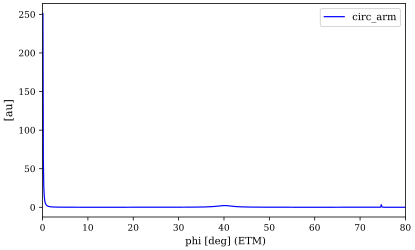

In [60]:
out.plot(['circ_arm'])

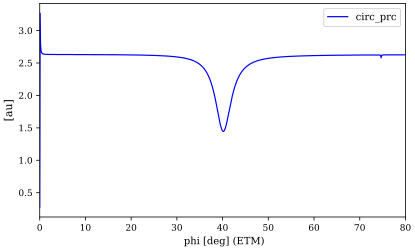

In [61]:
out.plot(['circ_prc'])

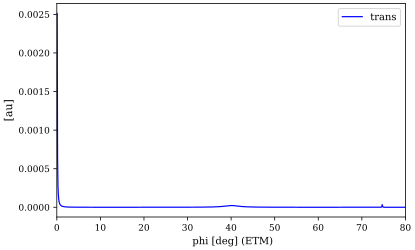

In [62]:
out.plot(['trans'])

In [63]:
#out.plot(['clock'])

In [64]:
#out.plot(['refl1'])
#print("slope",(out['refl1'][3001])/((out.x[3001])))

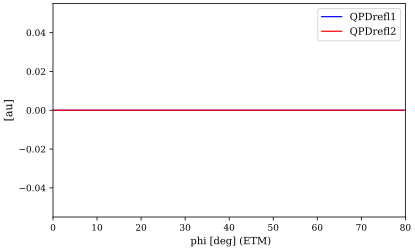

In [65]:
out.plot(['QPDrefl1','QPDrefl2'])

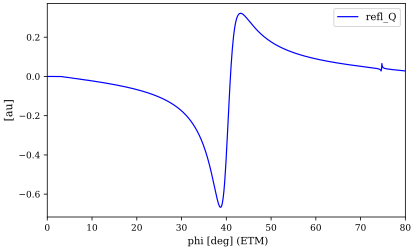

In [66]:
out.plot(['refl_Q'])

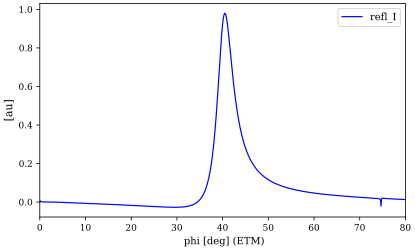

In [67]:
out.plot(['refl_I'])

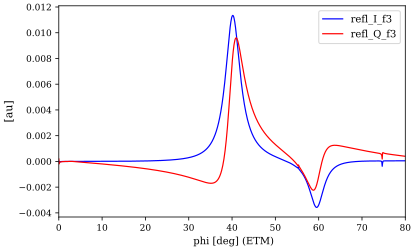

In [68]:
out.plot(['refl_I_f3','refl_Q_f3'])

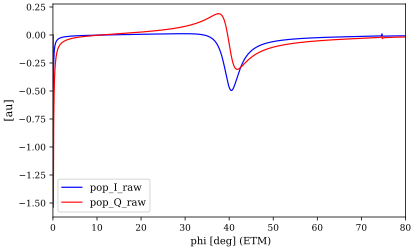

In [69]:
out.plot(['pop_I_raw','pop_Q_raw'])

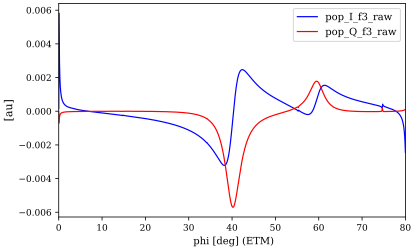

In [70]:
out.plot(['pop_I_f3_raw','pop_Q_f3_raw'])